Linear Regression 
=========================

## Example 1: Linear Regression with a Single Variable/Feature

*This example uses Gradient Descent to minimise the cost function and calculate $\theta$, where $\theta$ is a vector containing the fitting parameters for the hypothesis. It is also shown how the Normal Equation can be used to produce the optimal result*

### Import libraries 
We will mostly be using numpy for mathematical operations and matplotlib to produce plots 

In [209]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# we will use the following to plot the cost surface
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

### Generate Data
Here we generate data using the formula for a straight line, $y=mx+c = \theta_0 + \theta_1 x_1 $, and add noise. 

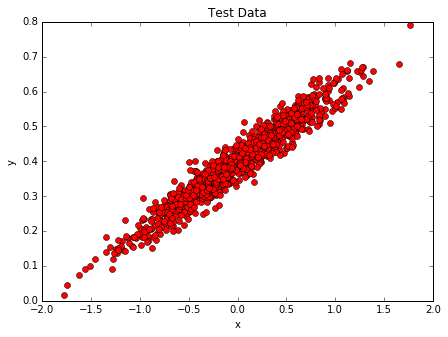

In [210]:
# Generate some data
num_points = 1000
x_data,y_data = [],[]

# Define theta parameters for producing test data - Gradient Descent should produce similar values
t0,t1 = 0.4,0.2

for i in xrange(num_points):
    x = np.random.normal(0.0,0.55)
    y = t0 + (x * t1) + np.random.normal(0.0,0.03)
    x_data.append(x)
    y_data.append(y)

# Plot the test data
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
plt.plot(x_data,y_data, 'ro')
plt.title('Test Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Setup and Initialise Parameters

The feature matrix $x$ currently only contains a vector of values for $x_1$ for the hypothesis:

$h_{\theta}(x) = \theta_0 + \theta_1 x_1 $,

adding an additional column of 1s enables us to calculate the cost in vectorised form:

$h_{\theta}(x) = (\theta_0\times1) + \theta_1 x_1 = \theta_0 x_0 + \theta_1 x_1 = \theta^Tx$

In [211]:
# size of dataset
m = np.shape(x_data)[0]
# Generate the feature matrix
X = np.column_stack((np.ones(m),x_data)) 
# Initialise theta vector
theta = np.array(np.zeros(2)) 

### Cost Function

The cost function indicates how badly the hypothesis represents the actual data points. During training we try to minimise this cost.

$J(\theta) = \frac{1}{m} \sum^m_{i=1} (h_{\theta}(x_i) - y_i))^2 $

In [212]:
def Cost(X,theta,m,y):

    h = np.dot(X,theta)
    S = np.sum((h - np.transpose(y))**2)
    J = S / (m) # or 2*m

    return J

with the initial $\theta$ vector of zeros we can calculate the cost/error of the hypothesis $h_{\theta}$

In [213]:
# initial cost
cost = Cost(X,theta,m,y_data)
print "initial cost: ", cost

initial cost:  0.172201597077


### Gradient Descent

Gradient descent is an optimisation technique used to minimise the cost function. We iteratively adjust the weights in $\theta$ to produce a better hypothesis.

$\theta_j = \theta_j - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta}(x^i) - y^i))x^i_j $

where $i$ is the training sample, $j$ is the index for each weight in $\theta$, and $\alpha$ is the learning rate which indicates how much we adjust the weights in the direction of the gradient.

In [214]:
def GradientDescent(X,y,theta,alpha,iterations,m):
    xTrans = X.transpose() 
    for i in xrange(iterations):

        h = np.dot(X,theta)
        errors = h - y 
        theta_change = (alpha/m) * np.dot(xTrans,errors)
        theta = theta - theta_change 

    return theta

In [215]:
# -- Define hyperparameters and run Gradient Descent -- #
# learning rate
alpha = 0.01 
# No. iterations for Gradient Descent
iterations = 1500
# Run Gradient Descent
theta = GradientDescent(X,y_data,theta,alpha,iterations,m)

### Optimised weights

The optimised $\theta$ values should be similar to the parameters t0,t1 in [2] that we used to generate our noisy test data. Also notice the cost is now much lower compared to when we initialised $\theta$

In [216]:
# new cost after optimisation
cost = Cost(X,theta,m,y_data)
print "theta: ", theta, " cost: ", cost

theta:  [ 0.39970949  0.19831842]  cost:  0.000910503409502


### Plotting the hypothesis

Given that the cost is low, the hypothesis should provide a good fit for our test data.

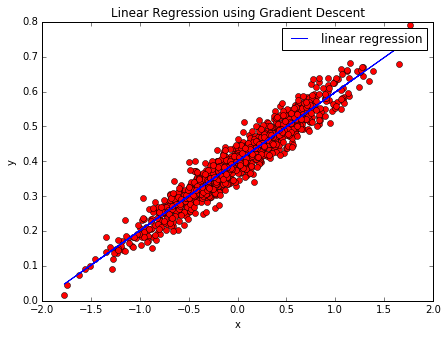

In [217]:
# plot the hypothesis with the learnt fitting values
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
h = np.dot(X,theta) 
plt.plot(x_data,y_data, 'ro')
plt.plot(x_data,h, label="linear regression")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.show()

### Generate the cost surface

If we calculate the cost for a wide range of $\theta_0$ and $\theta_1$ combinations we can plot the cost surface.

In [218]:
# generate theta values and produce a 2D meshgrid
theta0_vals = np.linspace(theta[0]-5,theta[0]+5,200)
theta1_vals = np.linspace(theta[1]-2,theta[1]+2,200)
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

# initialize J_vals to a matrix of 0's
J_vals = np.array(np.zeros((len(theta1_vals),len(theta0_vals))))

# Calculate the cost for each theta0 theta1 combination
for j in xrange(len(theta1_vals)):
    for i in xrange(len(theta0_vals)):
        t = np.array([theta0_vals[i],theta1_vals[j]])   
        J_vals[j,i] = Cost(X,t,m,y_data)

### Plot the cost surface

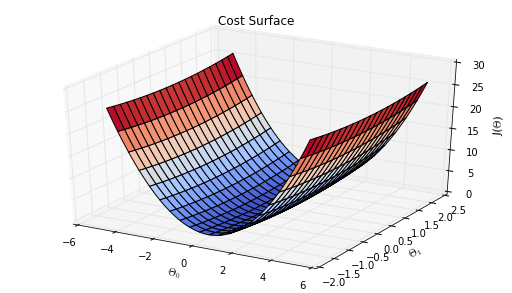

In [219]:
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T0, T1, J_vals, cmap=cm.coolwarm)
plt.xlabel('$\Theta_0$'); plt.ylabel('$\Theta_1$')
ax.set_zlabel('J($\Theta$)')
plt.title('Cost Surface')
plt.subplots_adjust(left=0.001,right=0.99)
plt.show()

We can also visualise the cost surface using a contour plot. In this example the optimal $\theta$, as calculated using Gradient Descent, is shown as a red X.

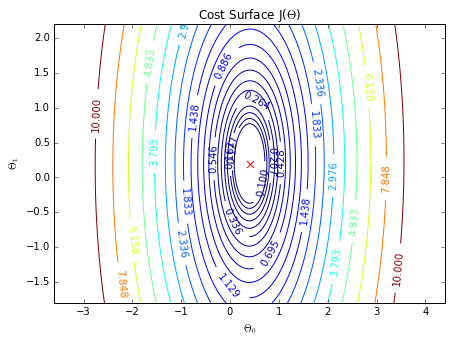

In [220]:
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
CS = plt.contour(theta0_vals, theta1_vals, J_vals,np.logspace(-1, 1, 20))
plt.scatter(theta[0],theta[1],marker='x',color='r',s=50)
plt.clabel(CS, inline=1, fontsize=10)	
plt.xlim(theta[0]-4,theta[0]+4)
plt.ylim(theta[1]-2,theta[1]+2)
plt.xlabel('$\Theta_0$'); plt.ylabel('$\Theta_1$')
plt.title('Cost Surface J($\Theta$)')
plt.show()

### Gradient Descent convergence

From the cost surface and contour plots we can get an idea of how well Gradient Descent performed at finding the optimal values of $\theta$. We could also plot the change in the cost for each iteration of Gradient Descent to make sure that it converges.

In [221]:
def GradientDescent_hist(X,y,theta,alpha,iterations,m):

    Jhist = np.zeros((iterations,1))
    xTrans = X.transpose() 
    for i in xrange(iterations):
        h = np.dot(X,theta)
        errors = h - np.transpose(y)  
        theta_change = (alpha/m) * np.dot(xTrans,errors)
        theta = theta - theta_change 

        Jhist[i] = Cost(X,theta,m,y)

    return theta,Jhist

In [222]:
theta,Jhist = GradientDescent_hist(X,y_data,theta,alpha,iterations,m)

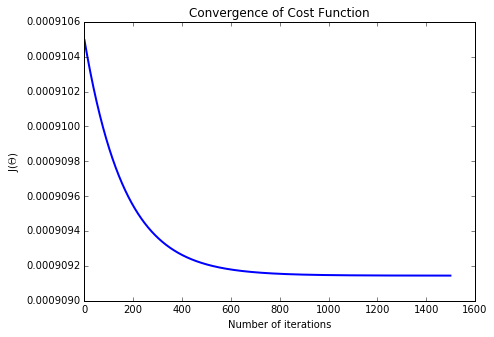

In [223]:
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
plt.plot(xrange(Jhist.size), Jhist, "-b", linewidth=2 )
plt.title("Convergence of Cost Function")
plt.xlabel('Number of iterations')
plt.ylabel('J($\Theta$)')
plt.show()

This is a useful technique to ensure your hyperparameters, $\alpha$ and the number of iterations, are suitable for the training data.

### Normal Equation

An alternative approach to Gradient Descent is to use the Normal Equation.

$\theta = (X^{T}X)^{-1}X^{T}y$

The Normal Equation will give you the exact solution without iterative optimisation. However, as the number of features $n$ increases, inverting matrix $X$ becomes highly computational. In this example we are only using Linear Regression with a single variable/feature - so it is very efficient!

In [224]:
def NormEq(X,y):
    return np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))

In [225]:
# Use Normal Equation
theta_normal = NormEq(X,y_data)

# new cost and theta after applying the Normal Equation
cost = Cost(X,theta_normal,m,y_data)
print "theta: ", theta_normal, " cost: ", cost

theta:  [ 0.3997227   0.20043352]  cost:  0.000909144355909


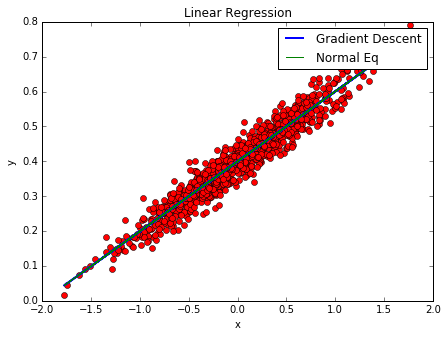

In [226]:
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
h_gradient = np.dot(X,theta) 
h_normal = np.dot(X,theta) 
plt.plot(x_data,y_data, 'ro')
plt.plot(x_data,h_gradient, label="Gradient Descent", color='b',linewidth=2.0)
plt.plot(x_data,h_normal, label="Normal Eq", color='g',linewidth=1.0)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()